## Linear Regrassion using function (linregress())

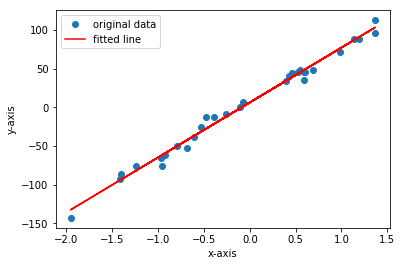

In [51]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_regression

x,y = make_regression(n_features=1,n_samples=30,bias=4,noise=8)

x = x.reshape((-1,))
y = y.reshape((-1,))

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

plt.plot(x, y,'o', label = 'original data')
plt.plot(x, intercept + slope*x, 'r', label = 'fitted line')

plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.legend()
plt.show()

## Linear Regression using gradient descent

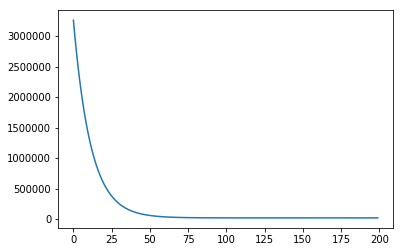

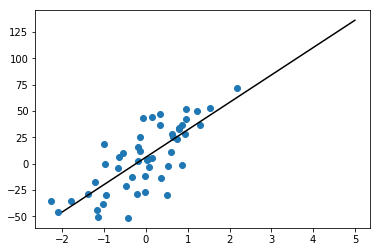

20114.14246126655


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression


def error(x, y, theta):
    
    total_error = 0
    
    for i in range (len(x)):
        total_error += (theta[1] * x[i] + theta[0] - y[i])**2

    return total_error
        
        
def cal_gradient(x, y, theta):
    
    grad = np.zeros((2,))

    for i in range(len(x)):
        
        grad[0] += (theta[1] * x[i] + theta[0] - y[i])
        grad[1] += (theta[1] * x[i] + theta[0] - y[i]) * x[i]
                   
    return grad


def gradientDescent(x, y):
    
    iterations = 200
    error_list = []
    theta_list = []
    theta = np.array([0.0,300.0])
    
    while iterations > 0:
        
        total_error = error(x, y, theta)
        error_list.append(total_error)
        grad = cal_gradient(x, y, theta)
        
        theta = theta - 0.001 * grad
        theta_list.append(theta)
        
        iterations -=1
    
    return theta, error_list, theta_list


def drawLine(theta):
    x_pts = np.linspace(-2,5,10)
    y_pts = theta[1] * x_pts + theta[0]

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')
    plt.show()
  


x, y = make_regression(n_features = 1, n_samples = 50, bias = 4, noise = 20)

x = x.reshape((-1,))
y = y.reshape((-1,))

theta, error_list, theta_list = gradientDescent(x, y)

theta_list = np.array(theta_list)

plt.plot(error_list)
plt.show()

drawLine(theta)

print(error_list[-1])

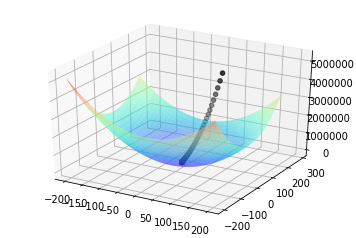

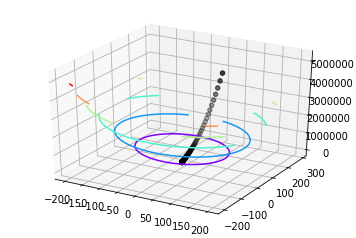

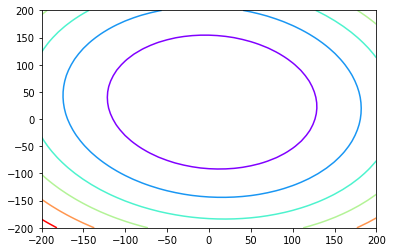

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

T0= np.arange(-200, 201, 10)

T1 = T0

T0, T1 = np.meshgrid(T0,T1)

m = T0.shape[0]
n = T0.shape[1]

J = np.zeros(T0.shape)

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((y - T1[i, j] * x - T0[i, j]) **2)
               

fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list, c = 'k')
axes.plot_surface(T0, T1, J, cmap = "rainbow", alpha = 0.5)
plt.show()

fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list, c = 'k')
axes.contour(T0, T1, J, cmap = "rainbow")
plt.show()

plt.contour(T0, T1, J, cmap = "rainbow")
#plt.scatter(theta_list[:,0],theta_list[:,1],error_list, marker = '^')
plt.show()

## Mini Batch Gradient Descent

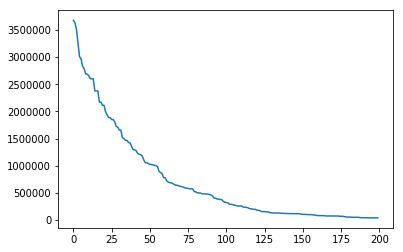

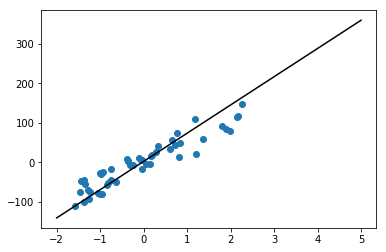

41259.253327265666


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression


def error(x, y, theta):
    
    total_error = 0
    
    for i in range (len(x)):
        total_error += (theta[1] * x[i] + theta[0] - y[i])**2

    return total_error
        
        
def cal_gradient(x, y, theta):
    
    grad = np.zeros((2,))

    indices = np.arange(y.shape[0])
    np.random.shuffle(indices)
    indices = indices[:1]

    for i in indices:
        
        grad[0] += (theta[1] * x[i] + theta[0] - y[i])
        grad[1] += (theta[1] * x[i] + theta[0] - y[i]) * x[i]
                   
    return grad


def gradientDescent(x, y):
    
    iterations = 200
    error_list = []
    theta_list = []
    theta = np.array([0.0,300.0])
    
    while iterations > 0:
        
        total_error = error(x, y, theta)
        error_list.append(total_error)
        grad = cal_gradient(x, y, theta)
        
        theta = theta - 0.01 * grad
        theta_list.append(theta)
        
        iterations -=1
    
    return theta, error_list, theta_list


def drawLine(theta):
    x_pts = np.linspace(-2,5,10)
    y_pts = theta[1] * x_pts + theta[0]

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')
    plt.show()
  


x, y = make_regression(n_features = 1, n_samples = 50, bias = 4, noise = 20)

x = x.reshape((-1,))
y = y.reshape((-1,))

theta, error_list, theta_list = gradientDescent(x, y)

theta_list = np.array(theta_list)

plt.plot(error_list)
plt.show()

drawLine(theta)

print(error_list[-1])

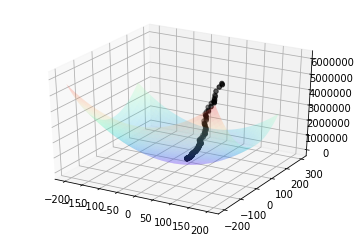

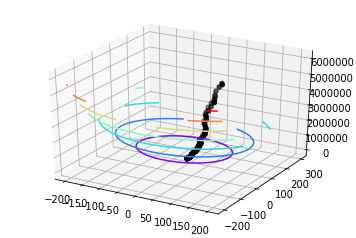

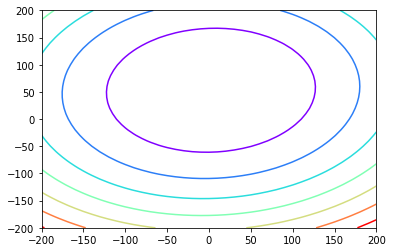

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

T0= np.arange(-200, 201, 10)

T1 = T0

T0, T1 = np.meshgrid(T0,T1)

m = T0.shape[0]
n = T0.shape[1]

J = np.zeros(T0.shape)

for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((y - T1[i, j] * x - T0[i, j]) **2)
               

fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list, c = 'k')
axes.plot_surface(T0, T1, J, cmap = "rainbow", alpha = 0.2)
plt.show()

fig = plt.figure()
axes = fig.gca(projection = "3d")
axes.scatter(theta_list[:,0],theta_list[:,1],error_list, c= 'k')
axes.contour(T0, T1, J, cmap = "rainbow")
plt.show()

plt.contour(T0, T1, J, cmap = "rainbow")
#plt.scatter(theta_list[:,0],theta_list[:,1],error_list, marker = '^')
plt.show()

In [3]:
y.shape[0]

50